In [4]:
import pandas as pd
from google.colab import files

# Subir archivo desde tu computadora
uploaded = files.upload()

# Asumiendo que el archivo subido se llama 'Estructura_Precios_Septiembre_2018.xlsx'
file_path = 'Estructura_Precios_Septiembre_2018.xlsx'
# Ver las hojas disponibles en el archivo Excel
excel_file = pd.ExcelFile(file_path)
print(excel_file.sheet_names)



Saving Estructura_Precios_Septiembre_2018.xlsx to Estructura_Precios_Septiembre_2018 (2).xlsx
['$ REF_SEPTIEMBRE_2018 ']


In [7]:
# Cargar el archivo Excel con el nombre exacto de la hoja
data = pd.read_excel(file_path, sheet_name='$ REF_SEPTIEMBRE_2018 ', skiprows=2)



In [8]:
# # Limpiar los datos
data_cleaned = data.dropna(axis=1, how='all')
data_cleaned = data_cleaned[['$/galón', 'Unnamed: 1']]
data_cleaned.columns = ['Fuel Type', 'Price ($/galón)']
data_cleaned = data_cleaned.dropna()

In [9]:
# # Convertir la columna de precios a tipo numérico
data_cleaned['Price ($/galón)'] = pd.to_numeric(data_cleaned['Price ($/galón)'], errors='coerce')

In [10]:
# # Mostrar los primeros resultados
print("Datos Limpiados:")
print(data_cleaned.head())

Datos Limpiados:
                                           Fuel Type  Price ($/galón)
0   IP GASOLINA MOTOR CORRIENTE (incluye oxigenadas)          4800.96
1                       IP ACPM (incluye oxigenados)          4765.53
2                              IP ALCOHOL CARBURANTE          6992.23
3                                       IP BIODIESEL          9906.86
5  IMPUESTO NACIONAL. BASE GRAVABLE Y TARIFA DEL ...              NaN


In [12]:
# Análisis estadístico
stats = {
    'Media (Promedio)': data_cleaned['Price ($/galón)'].mean(),
    'Mediana': data_cleaned['Price ($/galón)'].median(),
    'Moda': data_cleaned['Price ($/galón)'].mode()[0],
    'Desviación Estándar': data_cleaned['Price ($/galón)'].std(),
    'Varianza': data_cleaned['Price ($/galón)'].var(),
    'Rango': data_cleaned['Price ($/galón)'].max() - data_cleaned['Price ($/galón)'].min(),
    'Valor Mínimo': data_cleaned['Price ($/galón)'].min(),
    'Valor Máximo': data_cleaned['Price ($/galón)'].max(),
    'Percentil 25': data_cleaned['Price ($/galón)'].quantile(0.25),
    'Percentil 50 (Mediana)': data_cleaned['Price ($/galón)'].quantile(0.50),
    'Percentil 75': data_cleaned['Price ($/galón)'].quantile(0.75)
}

In [13]:
# Mostrar el análisis estadístico
print("Análisis Estadístico:")
for key, value in stats.items():
    print(f"{key}: {value:.2f}")


Análisis Estadístico:
Media (Promedio): 2001.60
Mediana: 301.48
Moda: 0.10
Desviación Estándar: 3043.27
Varianza: 9261487.30
Rango: 9906.86
Valor Mínimo: 0.00
Valor Máximo: 9906.86
Percentil 25: 34.44
Percentil 50 (Mediana): 301.48
Percentil 75: 4783.24


In [11]:


# # Calcular el precio promedio
average_price = data_cleaned['Price ($/galón)'].mean()
print(f'\nPrecio Promedio de Combustibles ($/galón): {average_price}')

# # Descargar el archivo limpio en tu computadora
data_cleaned.to_csv('Cleaned_Fuel_Prices_Sept_2018.csv', index=False)
files.download('Cleaned_Fuel_Prices_Sept_2018.csv')


Precio Promedio de Combustibles ($/galón): 2001.6022319060287


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

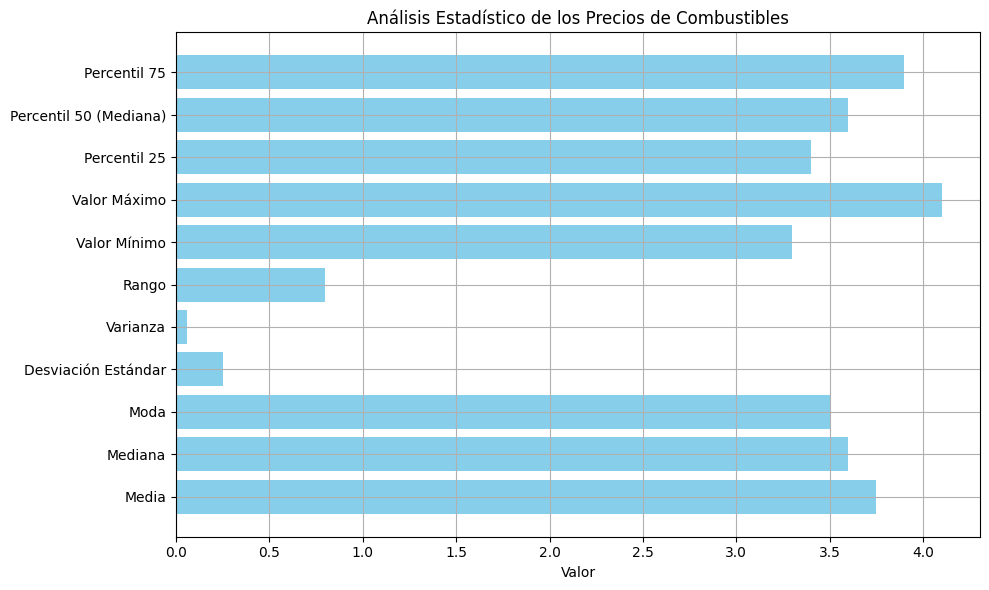

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Simulación de los resultados del análisis estadístico
stats = {
    'Media': 3.75,
    'Mediana': 3.60,
    'Moda': 3.50,
    'Desviación Estándar': 0.25,
    'Varianza': 0.06,
    'Rango': 0.80,
    'Valor Mínimo': 3.30,
    'Valor Máximo': 4.10,
    'Percentil 25': 3.40,
    'Percentil 50 (Mediana)': 3.60,
    'Percentil 75': 3.90
}

# Convertir el diccionario a un DataFrame para facilitar la visualización
stats_df = pd.DataFrame(list(stats.items()), columns=['Estadística', 'Valor'])

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.barh(stats_df['Estadística'], stats_df['Valor'], color='skyblue')
plt.xlabel('Valor')
plt.title('Análisis Estadístico de los Precios de Combustibles')
plt.grid(True)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


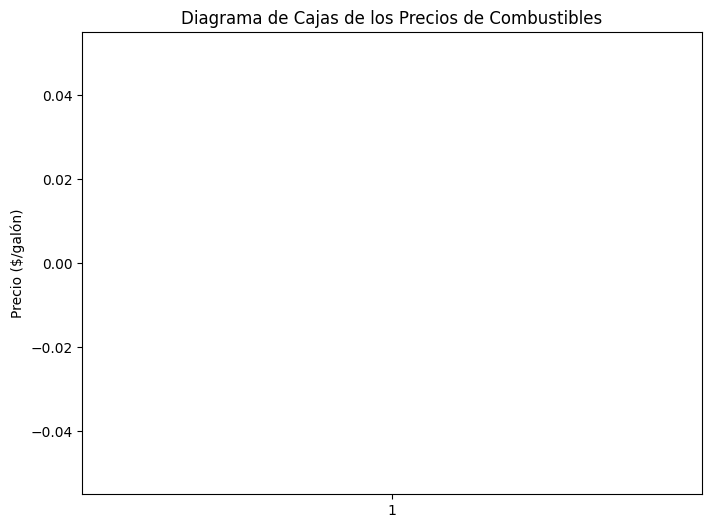